In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
import mpmath
import sympy as sp
import pandas as pd
from decimal import Decimal
import pickle
from Distillation_functions import DFS_search, evaluate_sequence, infidelity, depolarizing
mpmath.mp.dps = 70

In [8]:
max_levels = 6  # Set the maximum number of levels
in_error = mpmath.mpf("1.25e-2"); max_memory = mpmath.mpf("8"); target_output_error = mpmath.mpf("1e-12"); rate_seq = mpmath.mpf(1); total_memory_seq = 0; K_seq = mpmath.mpf(1)

codes_type = 'All'
df = pd.read_excel(f'CodesTable_All_Expanded.xlsx')

# for classical codes - keep only repetition codes:
max_rep_code = 12 # considering rep codes up to [12,1,12]
mask = (df['CodeType'] == 'Classical') & ((df['n'] != df['d']) | (df['n'] > max_rep_code)) # Create a mask for rows to remove

df = df[~mask]
# filter rows according to code type:
if codes_type == 'Quantum' or codes_type == 'Classical':
    df = df[df['CodeType'] == codes_type]
    
codes = df.to_numpy()

print(df)
# codes = codes[:4]
successful_sequences = DFS_search(codes, max_levels, [], evaluate_sequence, in_error, max_memory, target_output_error, rate_seq, total_memory_seq, K_seq)

print("Successful sequences:")
for sequence in successful_sequences:
    print(sequence)


# find the best sequence in terms of overhead:
best_sequence = []
best_overhead = 100000
for sequence in successful_sequences:
    if sequence.overhead < best_overhead:
        best_sequence = sequence 
        best_overhead = sequence.overhead
print(f"Best sequence is")
print(best_sequence)


        n   k  d   CodeType Basis
0       2   1  2  Classical     X
1       2   1  2  Classical     Y
2       2   1  2  Classical     Z
3       3   1  3  Classical     X
4       3   1  3  Classical     Y
...   ...  .. ..        ...   ...
1861   38  36  2    Quantum   NaN
1862   40  38  2    Quantum   NaN
1863   64  56  3    Quantum   NaN
1864   64  62  2    Quantum   NaN
1865  100  98  2    Quantum   NaN

[507 rows x 5 columns]
Successful sequences:
code_sequence=[[2, 1, 2, 'Classical', 'X'], [2, 1, 2, 'Classical', 'Y'], [2, 1, 2, 'Classical', 'X'], [2, 1, 2, 'Classical', 'Y'], [2, 1, 2, 'Classical', 'X']],         infidelity per qubit=4.9e-14, memory_sequence = [0, mpf('2.0'), mpf('3.0'), mpf('4.0'), mpf('5.0'), mpf('6.0')], memory_usage=6.0e+00, overhead per qubit =3.310e+01
code_sequence=[[2, 1, 2, 'Classical', 'X'], [2, 1, 2, 'Classical', 'Y'], [2, 1, 2, 'Classical', 'X'], [2, 1, 2, 'Classical', 'Y'], [3, 1, 3, 'Classical', 'X']],         infidelity per qubit=7.3e-14, memory_sequen

In [4]:
# find the best sequence in terms of overhead:
best_sequence = []
best_overhead = 100000
for sequence in successful_sequences:
    if sequence.overhead < best_overhead:
        best_sequence = sequence
        best_overhead = sequence.overhead
print(f"Best sequence is")
print(best_sequence)

Best sequence is
code_sequence=[[3, 1, 3, 'Classical', 'X'], [2, 1, 2, 'Classical', 'Y'], [2, 1, 2, 'Classical', 'X'], [6, 4, 2, 'Quantum']],         infidelity per qubit=6.3e-15, memory_sequence = [0, mpf('3.0'), mpf('4.0'), mpf('5.0'), mpf('10.0')], memory_usage=1.0e+01, overhead per qubit =1.893e+01


### Filling out the paper table - 2EPP scheme overheads:

Here we will use the optimized sequence, with only X and Z classical [2,1,2] codes. This code will provide the same results for the X,Z 2EPP scheme as the code in "Distillation_parity_2_1_example.ipynb".
Furthermore, we can use this code to check the best sequence of [2,1,2] codes in X, Z and Y bases, and see that it provides better overheads!

In [17]:
max_levels = 6  # Set the maximum number of levels
in_error = mpmath.mpf("1.25e-2"); max_memory = mpmath.mpf("3e1"); target_output_error = mpmath.mpf("1e-12"); rate_seq = mpmath.mpf(1); total_memory_seq = 0; K_seq = mpmath.mpf(1)

codes_type = 'Classical'
df = pd.read_excel(f'CodesTable_All_Expanded.xlsx')

# for classical codes - keep only repetition codes:
max_rep_code = 2 # considering rep codes up to [12,1,12]
mask = (df['CodeType'] == 'Classical') & ((df['n'] != df['d']) | (df['n'] > max_rep_code)) # Create a mask for rows to remove

df = df[~mask]
# filter rows according to code type:
if codes_type == 'Quantum' or codes_type == 'Classical':
    df = df[df['CodeType'] == codes_type]

# filter only X and Z bases: (do this if you want only X and Z bases)
# df = df[df['Basis'] != 'Y']

codes = df.to_numpy()

print(df)
successful_sequences = DFS_search(codes, max_levels, [], evaluate_sequence, in_error, max_memory, target_output_error, rate_seq, total_memory_seq,  K_seq)

    
# find the best sequence in terms of overhead:
best_sequence = []
best_overhead = 100000
for sequence in successful_sequences:
    if sequence.overhead < best_overhead:
        best_sequence = sequence
        best_overhead = sequence.overhead
print(f"Best sequence is")
print(best_sequence)

   n  k  d   CodeType Basis
0  2  1  2  Classical     X
1  2  1  2  Classical     Y
2  2  1  2  Classical     Z
Best sequence is
code_sequence=[[2, 1, 2, 'Classical', 'X'], [2, 1, 2, 'Classical', 'Y'], [2, 1, 2, 'Classical', 'X'], [2, 1, 2, 'Classical', 'Y'], [2, 1, 2, 'Classical', 'X'], [2, 1, 2, 'Classical', 'Z'], [2, 1, 2, 'Classical', 'X']],         infidelity per qubit=3.9e-18, memory_sequence = [0, mpf('2.0'), mpf('3.0'), mpf('4.0'), mpf('5.0'), mpf('6.0'), mpf('7.0'), mpf('8.0')], memory_usage=8.0e+00, overhead per qubit =1.482e+02


In [7]:
from Distillation_functions import *
a = ['I','X','Z','Y']
print(a)
b = hadamard(a); print(b)
c = s_mat(b); print(c)
d = hadamard(c); print(d)

['I', 'X', 'Z', 'Y']
['I', 'Z', 'X', 'Y']
['I', 'Y', 'X', 'Z']
['I', 'X', 'Y', 'Z']


#### Plotting code sequences:

0.01
finished step 0 with code = [4, 1, 2], output infidelity = [mpf('0.9975015487828833048760218189510584608875659177105211465526359529170003475317689367038878227890179960951'), mpf('0.001227693748961182212417461204877532826642087608225925869962678110031580060742509179371723002070080536702'), mpf('0.001227693748961182212417461204877532826642087608225925869962678110031580060742509179371723002070080536702'), mpf('0.00004306371919433069914325863918647345914990707302700170743869086293649234674604493736873120684184282498007')]
finished step 1 with code = [4, 1, 2], output infidelity = [mpf('0.9999909071043721897845145094046414773284205548665327037083398202189081475876855613513518729334321976813'), mpf('0.000006059093567802607965265599558517126361403985464666069751096715942295942164303969991263311655863301480839'), mpf('0.000003033278898707641442200597855764330466318209262548946113038250745661977200425254016917979354027555608932'), mpf('0.0000000005231612999660780243979442412147517229387400

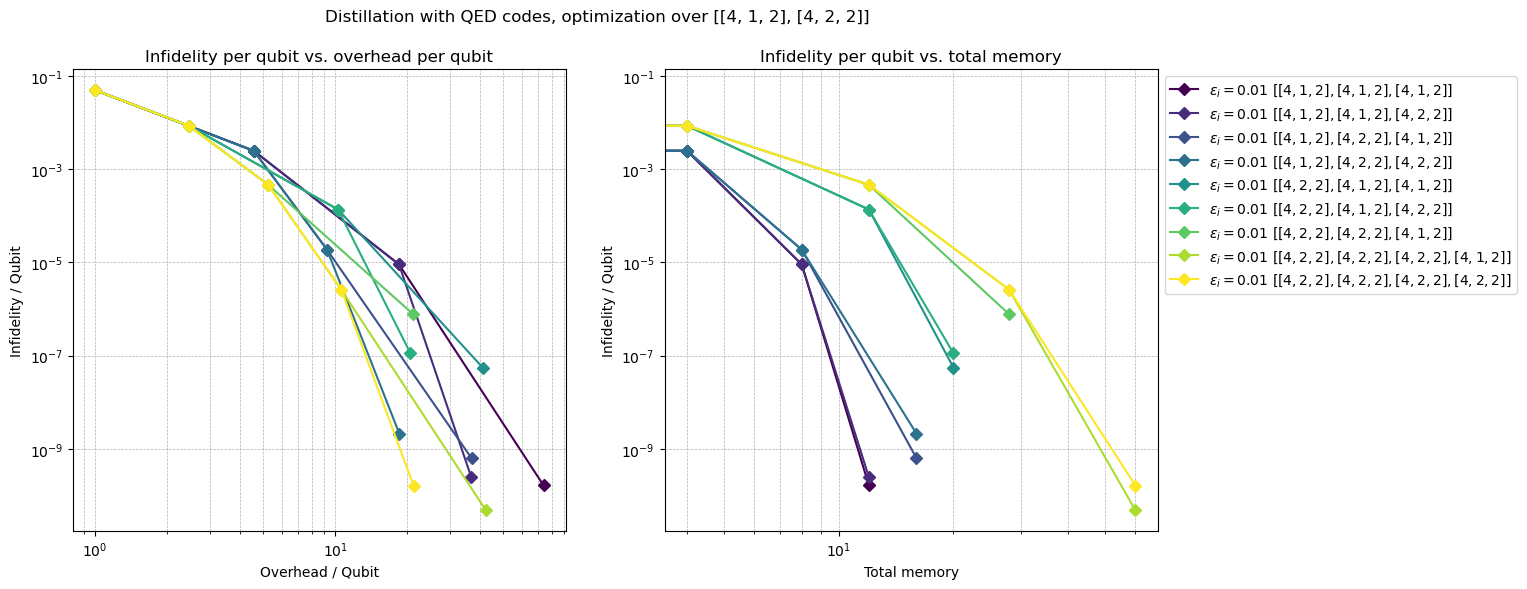

In [ ]:
fig = plt.figure(figsize=(14, 6)) 
axs = fig.subplots(1, 2)

for i in range(len(axs)):
    axs[i].set_xscale('log'); axs[i].set_yscale('log')
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5)


axs[0].set_xlabel("Overhead / Qubit"); axs[0].set_ylabel("Infidelity / Qubit"); axs[0].set_title("Infidelity per qubit vs. overhead per qubit")
axs[1].set_xlabel("Total memory"); axs[1].set_ylabel("Infidelity / Qubit"); axs[1].set_title("Infidelity per qubit vs. total memory")

plt.suptitle(f"Distillation with QED codes, optimization over {codes}")

colors = ['C0', 'C1', 'C2', 'C3']
min_values = []
linestyles = ['-', ':', '--', '-.']

probabilities = [mpmath.mpf("0.01"), mpmath.mpf("0.05"), mpmath.mpf("0.10"), mpmath.mpf("0.15")]
probabilities = [mpmath.mpf("0.01")]
for i, p in enumerate(probabilities):
    print(p)
    
    # colors:
    num_colors = len(successful_sequences)  # Change this to the number of plots you have
    colormap = plt.cm.viridis  # You can choose any colormap you like
    colors = np.linspace(0, 1, num_colors)
    
    best_sequence = 0
    best_overhead = 100
    for seq_index, sequence in enumerate(successful_sequences):
        
        levels = len(sequence.code_sequence)
        in_error = mpmath.mpf("5e-2"); max_memory = mpmath.mpf("5e2"); target_output_error = mpmath.mpf("1e-10"); rate_seq = mpmath.mpf(1); total_memory_seq = 0; K_seq = mpmath.mpf(1)

        overheads_seq = [1]; infidelity_per_logical_seq = [in_error]; total_memory_seq_list = [0]

        for l in range(levels):
            code = sequence.code_sequence[l]
            # print(K_seq)
            result, in_error, max_memory, target_output_error, rate_seq, total_memory_seq,  K_seq = evaluate_sequence(code, in_error, 
                                                                max_memory, target_output_error, rate_seq, total_memory_seq,  K_seq)
            overhead = mpmath.mpf(1) / rate_seq  # overhead per qubits = N/k
            infidelity_per_logical = infidelity(in_error) /  K_seq # error per qubit = epsilon / k
            overheads_seq.append(float(overhead))
            infidelity_per_logical_seq.append(float(infidelity_per_logical))
            total_memory_seq_list.append(float(total_memory_seq))
            
            print(f"finished step {l} with code = {code}, output infidelity = {in_error}")
        # print(overheads_seq)
        # print(infidelity_per_logical_seq)
        
        linestyle = linestyles[i]
        color = colormap(colors[seq_index]) 
        axs[0].plot(overheads_seq, infidelity_per_logical_seq, label=f"$\epsilon_i={p}~{sequence.code_sequence}$", marker='D', linestyle=linestyle, color=color)
        axs[1].plot(total_memory_seq_list, infidelity_per_logical_seq, label=f"$\epsilon_i={p}~{sequence.code_sequence}$", marker='D', linestyle=linestyle, color=color)
        
        if overhead < best_overhead:
            best_sequence = sequence
            best_overhead = overhead
        

        # min_values.append(min(min(lfr), min(lfr_baseline)))

# min_y_limit = min(min_values)
# plt.ylim(float(mpmath.mpf("1e-14")), float(mpmath.mpf("1")))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.savefig("distill.pdf")

print(best_sequence)

#### Optimization over overhead for different p_in:

In [ ]:
## choose codes:
df = pd.read_excel('CodeTables.xlsx')
codes = df.to_numpy()
# codes = []
# parity codes:
for i in range(1,5):
    n = 4*i**2
    np.append(codes,[n,n-2,2])
    # codes.append([n,n-2,2])

# quantum Hamming codes:
for r in range(3,6):
    n = 2**r
    k = 2**r-r-2
    d = 3
    np.append(codes,[n,k,d])
    # codes.append([n,k,d])
    
# print(codes)
codes = [[4,1,2], [4,2,2]]

max_levels = 6  # Set the maximum number of levels

rate_seq = mpmath.mpf(1); total_memory_seq = 0; K_seq = mpmath.mpf(1)

# in_errors = np.linespace(1e-3, 20e-2,10)
max_memory_vec = np.linspace(100,1500,50)

in_error = mpmath.mpf("1e-2"); target_output_error = mpmath.mpf("1e-12")

best_sequences = []
overheads_best_sequences = []
for max_memory in max_memory_vec:
    successful_sequences = DFS_search(codes, max_levels, [], evaluate_sequence, in_error, max_memory, target_output_error, rate_seq, total_memory_seq,  K_seq)
    print(f"For max_memory = {max_memory}, found {len(successful_sequences)} sequences")
    
    # find the best sequence in terms of overhead:
    best_sequence = 0
    best_overhead = 100
    for sequence in successful_sequences:
        if sequence.overhead < best_overhead:
            best_sequence = sequence
            best_overhead = sequence.overhead
    print(f"Best sequence is {best_sequence}")
    best_sequences.append(best_sequence)
    overheads_best_sequences.append(best_sequence.overhead)
    

    

For max_memory = 100.0, found 10 sequences
Best sequence is code_sequence=[[4, 1, 2], [4, 2, 2], [4, 2, 2]], infidelity per qubit=3.7e-15,         total_memory_seq=1.6e+01, overhead per qubit =1.6e+01
For max_memory = 128.57142857142858, found 10 sequences
Best sequence is code_sequence=[[4, 1, 2], [4, 2, 2], [4, 2, 2]], infidelity per qubit=3.7e-15,         total_memory_seq=1.6e+01, overhead per qubit =1.6e+01
For max_memory = 157.14285714285714, found 10 sequences
Best sequence is code_sequence=[[4, 1, 2], [4, 2, 2], [4, 2, 2]], infidelity per qubit=3.7e-15,         total_memory_seq=1.6e+01, overhead per qubit =1.6e+01
For max_memory = 185.71428571428572, found 10 sequences
Best sequence is code_sequence=[[4, 1, 2], [4, 2, 2], [4, 2, 2]], infidelity per qubit=3.7e-15,         total_memory_seq=1.6e+01, overhead per qubit =1.6e+01
For max_memory = 214.28571428571428, found 10 sequences
Best sequence is code_sequence=[[4, 1, 2], [4, 2, 2], [4, 2, 2]], infidelity per qubit=3.7e-15,      